#  Beam-based Sensor Models

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm, truncexpon
%matplotlib inline 

In [74]:
# hit, unexp, max, rand
params_list = [(0.25, 0.25, 0.25, 0.25), (0.4, 0.4, 0.1, 0.1), (0.8,0.1,0.05,0.05)]
params = params_list[0]

In [64]:
def probabilistic_model(true_range, stdv_measure, z_max, params):
    a1, b1 = (0 - true_range)/stdv_measure, (z_max - true_range)/stdv_measure
    p1 = truncnorm(a1, b1, loc=true_range, scale=stdv_measure).pdf
    b2 = true_range
    p2 = truncexpon(b2).pdf
    p3 = 1/z_max
    def resulting_prob(x):
        # result = np.array(len(x))
        # result[np.where(x<0 or x>z_max)] = 0
        if x<0 or x>z_max:
            return 0
        elif x>z_max-0.05 and x<z_max+0.05:
            return params[2]
        else:
            return p1(x)*params[0]+p2(x)*params[1]+p3*params[3]
    return resulting_prob

In [89]:
def get_result_and_figure(params1, params2):
    prob_func = probabilistic_model(*params1, params2)
    x = np.linspace(0, 10, 1000)
    result = list(map(prob_func,x))
    plt.figure(figsize=(8,6))
    ax = plt.gca()
    ax.set_xlim([0,10])
    ax.set_ylim([0, 1.7])
    ax.plot(x, result , 'k-', lw=2, alpha=0.6, label='truncnorm pdf')

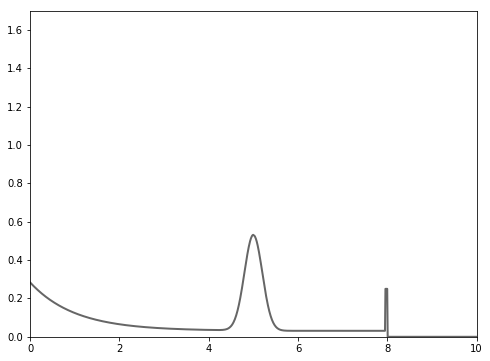

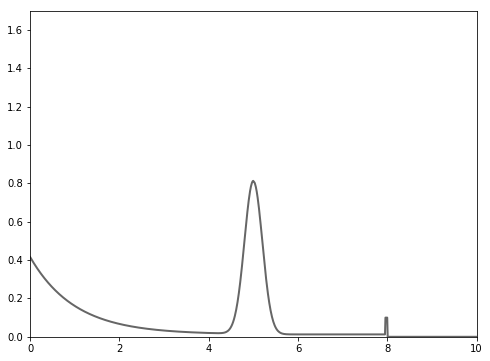

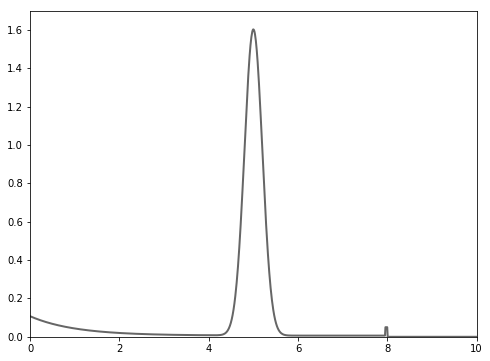

In [90]:
params1 = (5, 0.2, 8)
for params in params_list:
    get_result_and_figure(params1, params)

## Truncated Normal Distribution

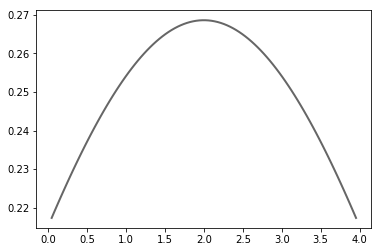

In [34]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncnorm.html
myclip_a, myclip_b, my_mean, my_std = 0, 4, 2, 3
a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std
x = np.linspace(truncnorm.ppf(0.01, a, b, loc=my_mean,scale=my_std), truncnorm.ppf(0.99, a, b, loc=my_mean,scale=my_std), 100)
ax = plt.gca()
ax.plot(x, truncnorm.pdf(x, a, b, loc=my_mean,scale=my_std), 'k-', lw=2, alpha=0.6, label='truncnorm pdf')

## Truncated Exponential Distribution

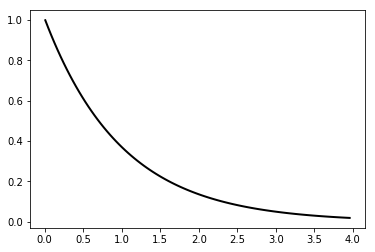

In [20]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncexpon.html#scipy.stats.truncexpon
b = 4.69
rv = truncexpon(b)
x = np.linspace(truncexpon.ppf(0.01, b),
                 truncexpon.ppf(0.99, b), 100)
ax = plt.gca()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')